<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-05 13:13:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.5MB/s    in 3.6s    

2025-03-05 13:13:13 (56.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 170.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 200.3 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 132.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 144.1 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


In [7]:
df

,COUNT(*)
0,65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


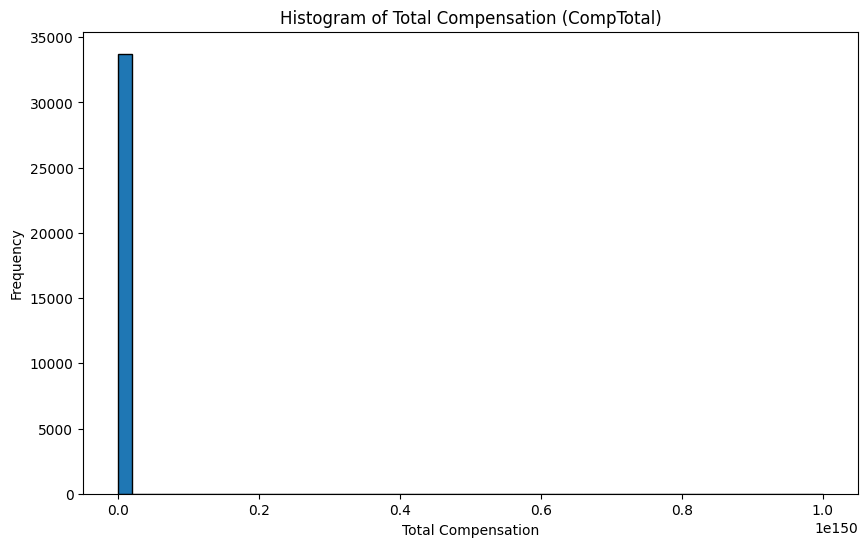

In [10]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# 1.1 Histogram of CompTotal (Total Compensation)
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp_total = pd.read_sql_query(QUERY, conn)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp_total['CompTotal'], bins=50, edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


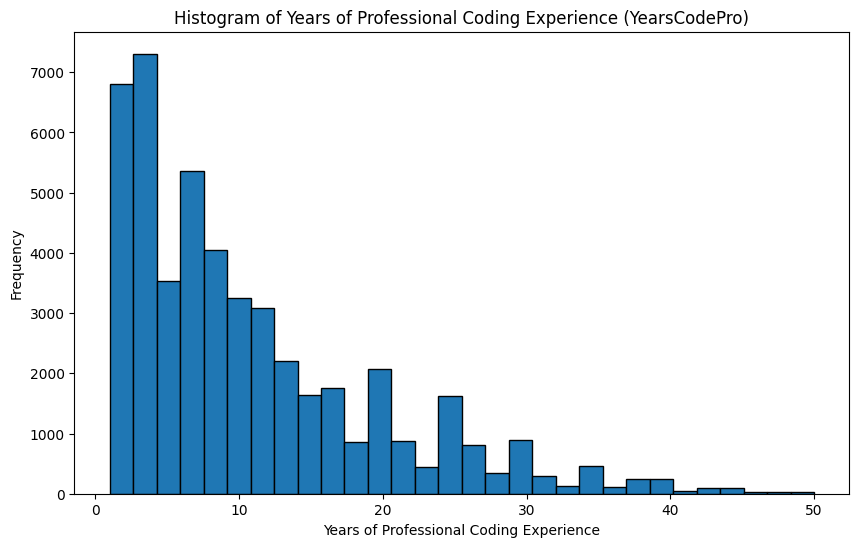

In [12]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# 1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL AND YearsCodePro != 'Less than 1 year' AND YearsCodePro != 'More than 50 years'"
df_years_code_pro = pd.read_sql_query(QUERY, conn)

# Clean and convert 'YearsCodePro' to numeric
def clean_years_code(years):
    try:
        return float(years)
    except ValueError:
        return None

df_years_code_pro['YearsCodePro'] = df_years_code_pro['YearsCodePro'].apply(clean_years_code)
df_years_code_pro = df_years_code_pro.dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_years_code_pro['YearsCodePro'], bins=30, edgecolor='black')
plt.title('Histogram of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


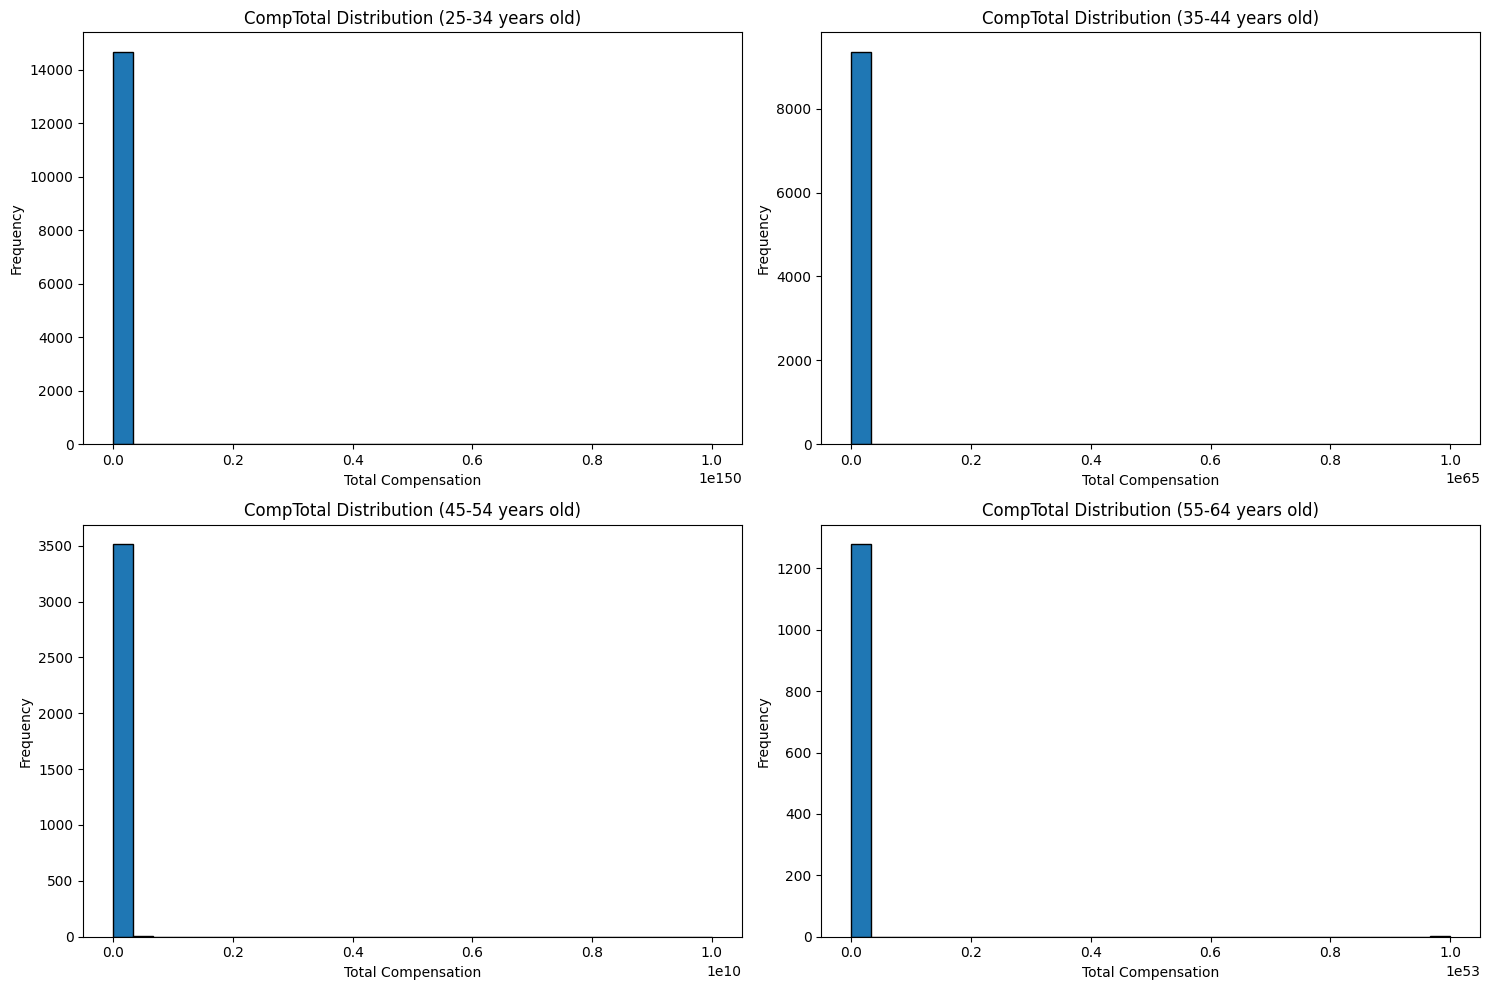

In [11]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal and Age
QUERY = "SELECT CompTotal, Age FROM main WHERE CompTotal IS NOT NULL AND Age IN ('25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old')"
df = pd.read_sql_query(QUERY, conn)

# Age groups to compare
age_groups = ['25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']

# Create subplots for each age group
plt.figure(figsize=(15, 10))

for i, age_group in enumerate(age_groups, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, ith subplot
    age_data = df[df['Age'] == age_group]['CompTotal']
    plt.hist(age_data, bins=30, edgecolor='black')
    plt.title(f'CompTotal Distribution ({age_group})')
    plt.xlabel('Total Compensation')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Close the connection
conn.close()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


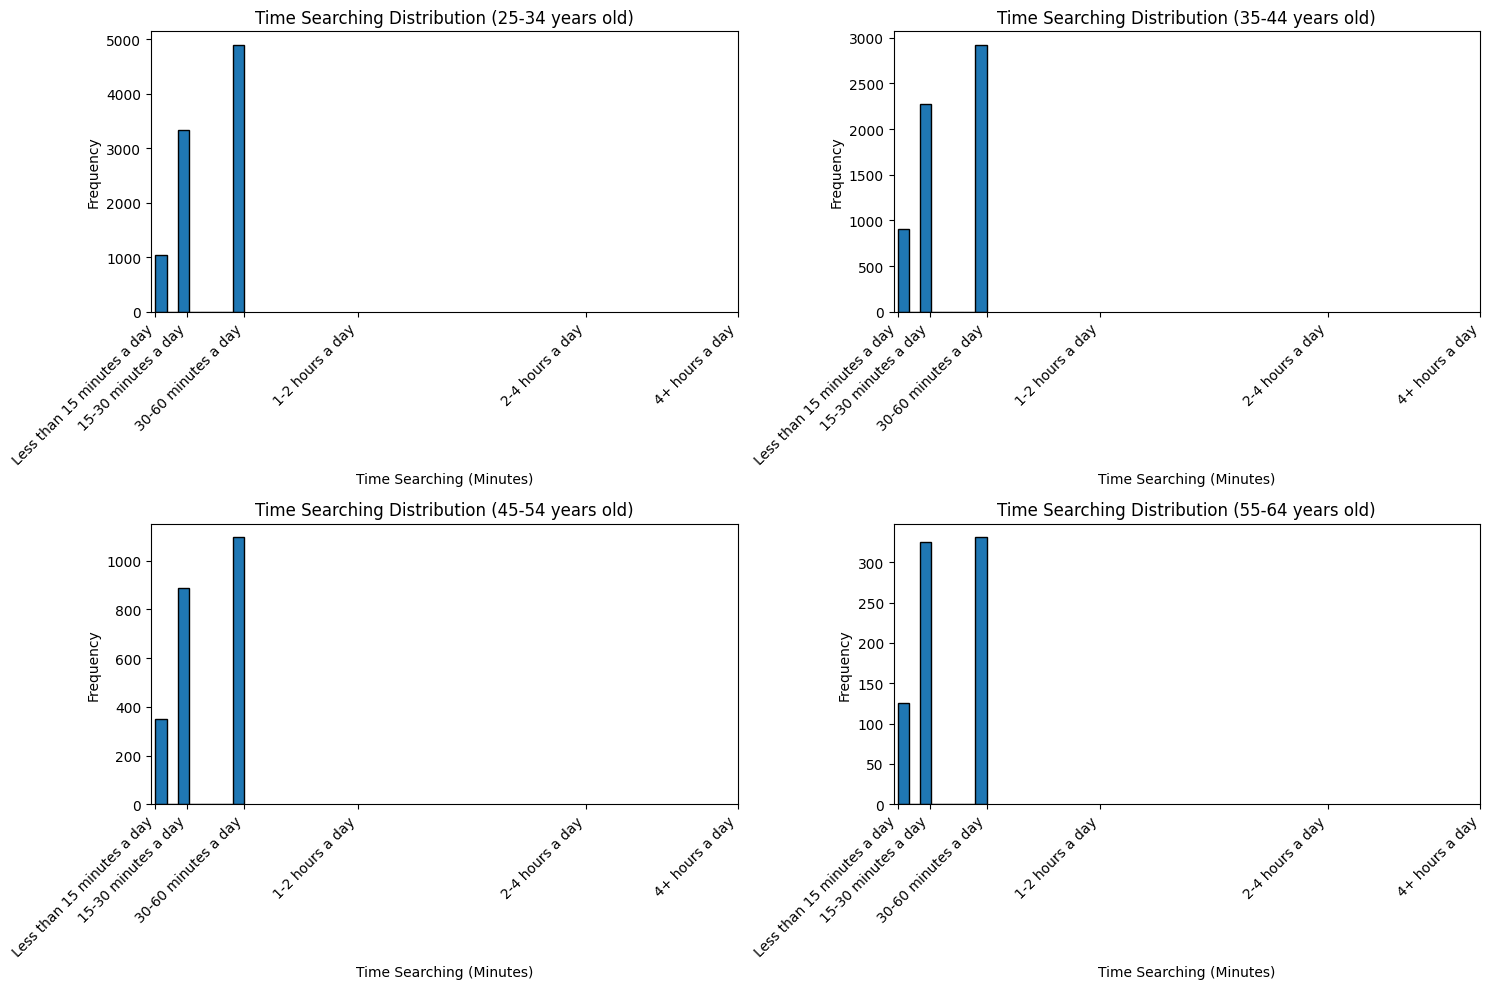

In [1]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get TimeSearching and Age
QUERY = "SELECT TimeSearching, Age FROM main WHERE TimeSearching IS NOT NULL AND Age IN ('25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old')"
df = pd.read_sql_query(QUERY, conn)

# Age groups to compare
age_groups = ['25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']

# TimeSearching mapping to numeric values
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '1-2 hours a day': 90,
    '2-4 hours a day': 180,
    '4+ hours a day': 240
}

# Convert TimeSearching to numeric
df['TimeSearching_Numeric'] = df['TimeSearching'].map(time_mapping)

# Create subplots for each age group
plt.figure(figsize=(15, 10))

for i, age_group in enumerate(age_groups, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, ith subplot
    age_data = df[df['Age'] == age_group]['TimeSearching_Numeric'].dropna()
    plt.hist(age_data, bins=8, edgecolor='black') # Using 8 bins as there are 6 distinct time ranges.
    plt.title(f'Time Searching Distribution ({age_group})')
    plt.xlabel('Time Searching (Minutes)')
    plt.ylabel('Frequency')
    plt.xticks(list(time_mapping.values()), list(time_mapping.keys()), rotation=45, ha='right')
    plt.tight_layout()

plt.show()

# Close the connection
conn.close()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [3]:
!pip install seaborn

/tmp/ipykernel_585/16179616.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=database_counts.values, y=database_counts.index, palette='viridis')


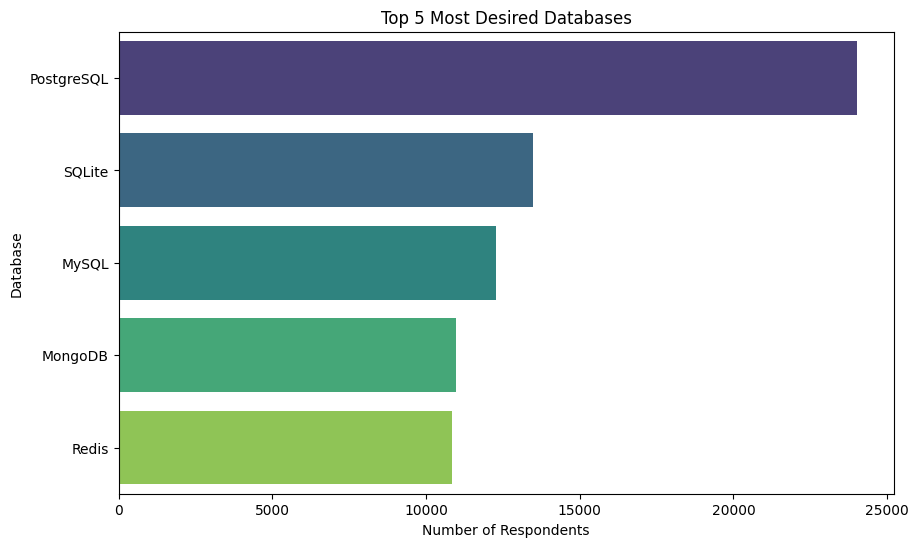

In [4]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For better styling

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get DatabaseWantToWorkWith
QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
database_counts = pd.Series(
    [db.strip() for databases in df['DatabaseWantToWorkWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(5)

# Plotting the histogram (using seaborn for better styling)
plt.figure(figsize=(10, 6))
sns.barplot(x=database_counts.values, y=database_counts.index, palette='viridis')
plt.title('Top 5 Most Desired Databases')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.show()

# Close the connection
conn.close()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_585/2662211068.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette='pastel')


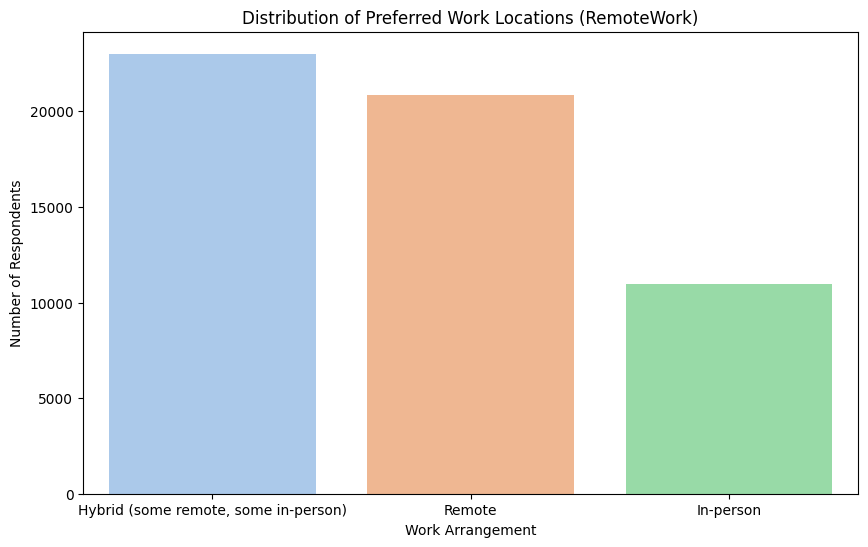

In [5]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get RemoteWork
QUERY = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each RemoteWork value
remote_work_counts = df['RemoteWork'].value_counts()

# Plotting the histogram (bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette='pastel')
plt.title('Distribution of Preferred Work Locations (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.show()

# Close the connection
conn.close()


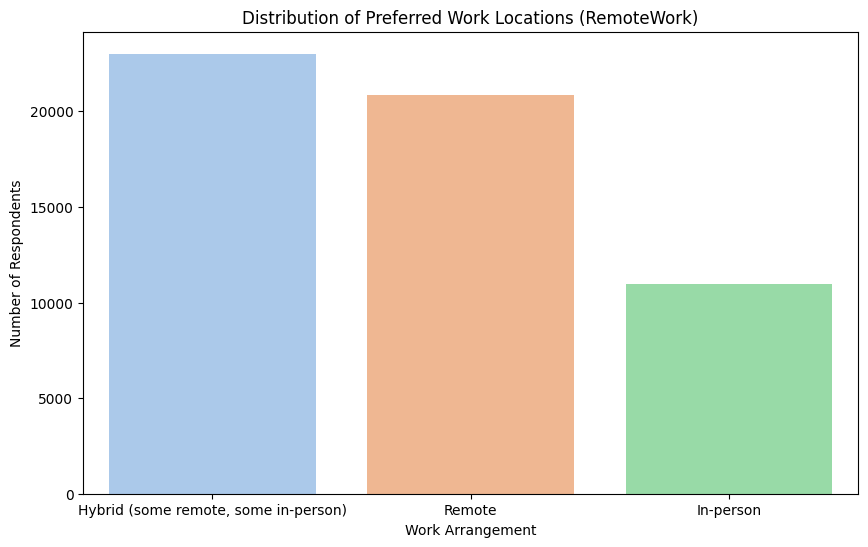

In [7]:
# 3.2 Histogram of Preferred Work Locations (RemoteWork)
#
# Objective: Use a histogram to explore the distribution of preferred work arrangements (remote work).
#
# case 2
#

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get RemoteWork
QUERY = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each RemoteWork value
remote_work_counts = df['RemoteWork'].value_counts()

# Plotting the histogram (bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette='pastel', hue=remote_work_counts.index, legend=False)
plt.title('Distribution of Preferred Work Locations (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.show()

# Close the connection
conn.close()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


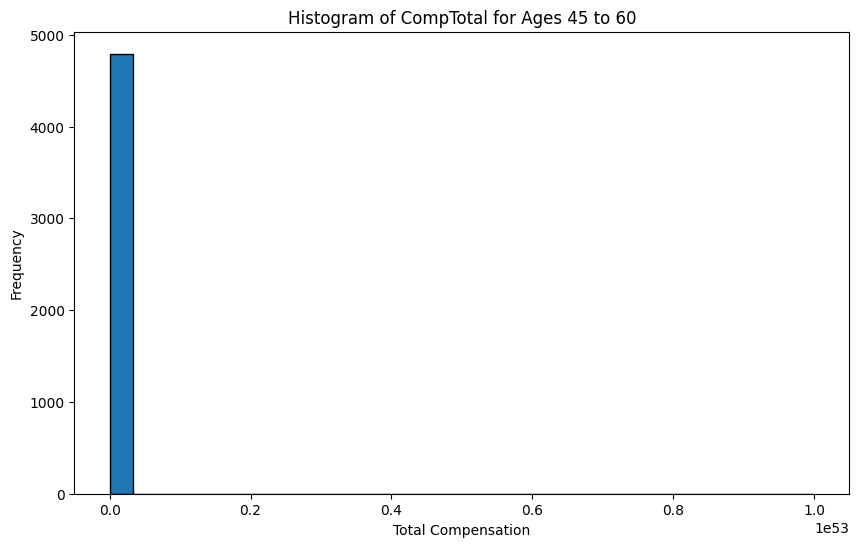

In [8]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal for ages 45 to 60
QUERY = """
SELECT CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old') AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, edgecolor='black')
plt.title('Histogram of CompTotal for Ages 45 to 60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


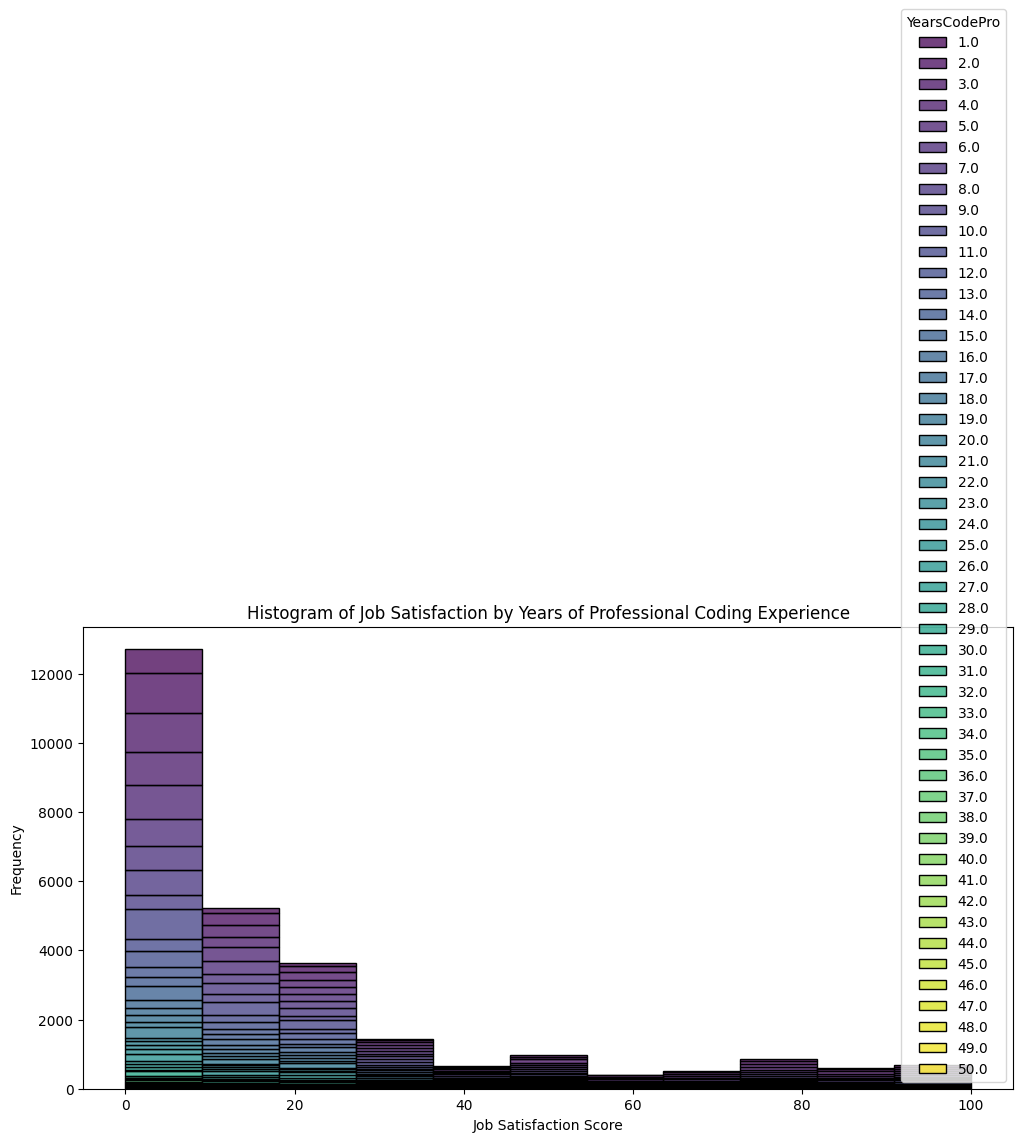

In [9]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get JobSat and YearsCodePro
QUERY = """
SELECT JobSatPoints_1, YearsCodePro
FROM main
WHERE JobSatPoints_1 IS NOT NULL AND YearsCodePro IS NOT NULL
AND YearsCodePro != 'Less than 1 year' AND YearsCodePro != 'More than 50 years'
"""
df = pd.read_sql_query(QUERY, conn)

# Clean and convert 'YearsCodePro' to numeric
def clean_years_code(years):
    try:
        return float(years)
    except ValueError:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years_code)
df = df.dropna()

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='JobSatPoints_1', hue='YearsCodePro', multiple='stack', bins=11, palette='viridis')
plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

# Close the connection
conn.close()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [10]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
